In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def remove_zero_columns(data):
    for column in data.columns:
        if column == 'label':
            continue
        if data[column].sum() == 0:
            data.drop(column, axis=1, inplace=True)
    return data

In [3]:
dominant_color = pd.read_csv('dominant_colors.csv')
histogram = pd.read_csv('histograms.csv')
texture = pd.read_csv('texture_features.csv')
labels = pd.read_csv('labels.csv')
shapes = pd.read_csv('shape_features.csv')

import random
random_10 = random.sample(list(labels['label'].unique()), 10)
random_20 = random.sample(list(labels['label'].unique()), 20)

In [5]:
def results(y_pred, y_test, labels):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: ', accuracy)
    precision = precision_score(y_test, y_pred, average='weighted')
    print('Precision: ', precision)
    recall = recall_score(y_test, y_pred, average='weighted')
    print('Recall: ', recall)

    conf_matrix = confusion_matrix(y_test, y_pred)
    true_positive = np.diag(conf_matrix)
    print('True Positive: ', true_positive)

    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='g')  # 'g' format ensures that integers are displayed properly

    # Setting labels, title and ticks
    plt.ylabel('Actual', fontsize=12)
    plt.title('Confusion Matrix', fontsize=15)
    plt.xticks(np.arange(len(labels)) + 0.5, labels, rotation=45, ha='right')  # Adjust tick positions and labels
    plt.yticks(np.arange(len(labels)) + 0.5, labels, rotation=0)

# SVM

Accuracy:  0.365
Precision:  0.37342389942249493
Recall:  0.365
True Positive:  [30 38 39 32 36 42 31 46 30 41]


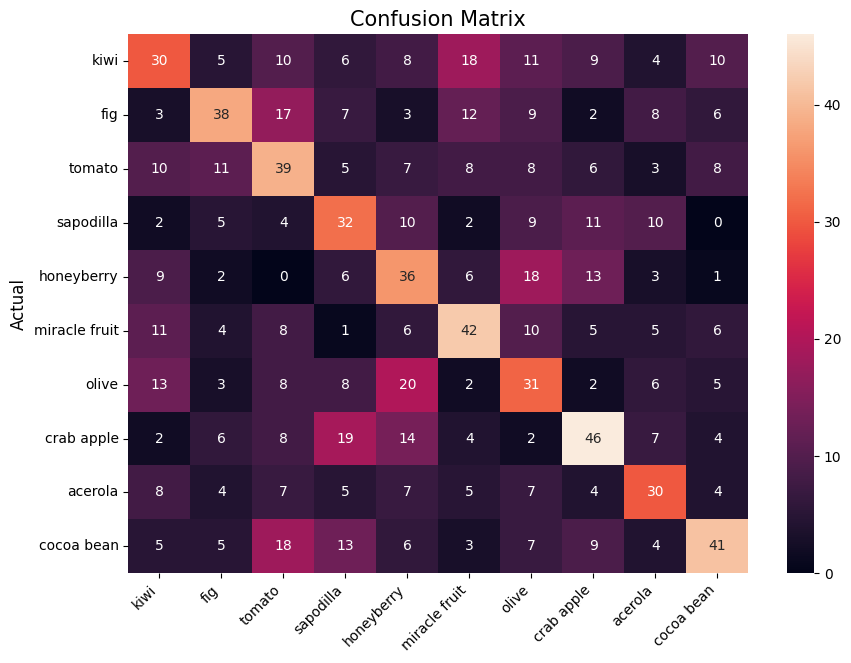

In [6]:


data_svm = pd.concat([texture,dominant_color,histogram, shapes,labels], axis=1)
data_svm = data_svm[data_svm['label'].isin(random_10)]
data_svm = remove_zero_columns(data_svm)

#train svm model
from sklearn import svm
from sklearn.model_selection import train_test_split

X = data_svm.drop('label', axis=1)
y = data_svm['label']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = svm.SVC(kernel='rbf', C=100, gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_10)

# RANDOM FOREST with 20 Class

Accuracy:  0.2785
Precision:  0.2768293827384224
Recall:  0.2785
True Positive:  [41 13 18 31 34 25 40 32 17 15 20 47 27 48 21 19 15 51 22 21]


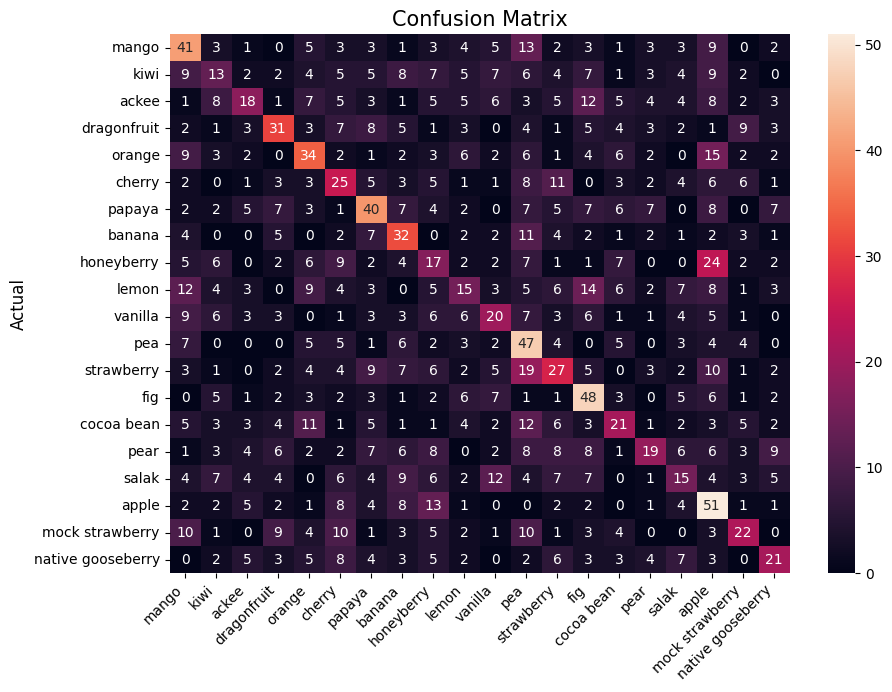

In [7]:
#train random forest model
from sklearn.ensemble import RandomForestClassifier

data_rf = pd.concat([texture,dominant_color,histogram, shapes,labels], axis=1)
data_rf = data_rf[data_rf['label'].isin(random_20)]

data_rf = remove_zero_columns(data_rf)
data_rf.dropna(inplace=True)

X = data_rf.drop('label', axis=1)
y = data_rf['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=3000, max_depth=25, random_state=42, criterion='gini', 
                             min_samples_split=2, min_samples_leaf=5, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_20)

# RANDOM FOREST with 10 class

Accuracy:  0.354
Precision:  0.3715157387228744
Recall:  0.354
True Positive:  [28 47 36 33 40 35 26 34 31 44]


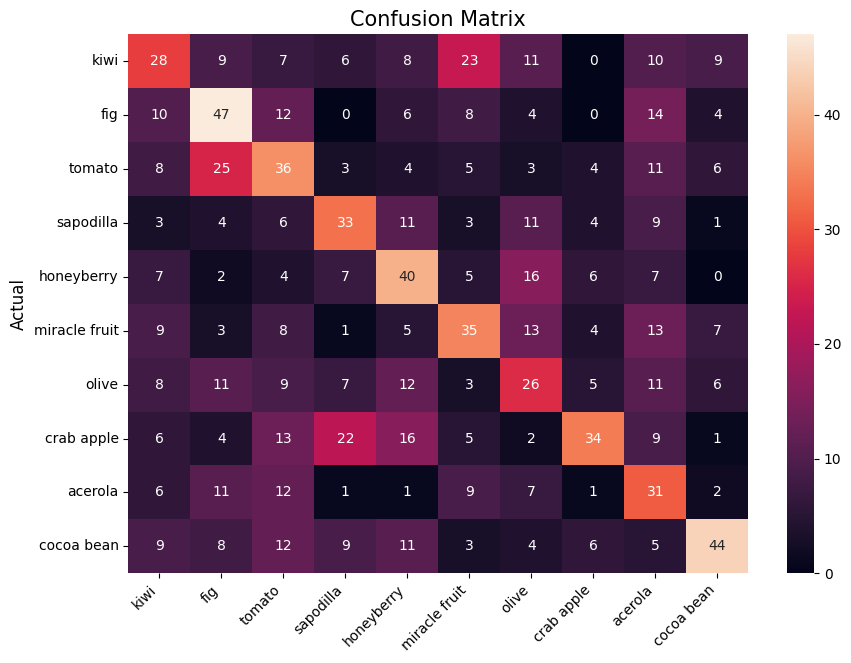

In [8]:
#train random forest model
from sklearn.ensemble import RandomForestClassifier

data_rf = pd.concat([texture,dominant_color,histogram, shapes,labels], axis=1)

data_rf = data_rf[data_rf['label'].isin(random_10)]

data_rf = remove_zero_columns(data_rf)
data_rf.dropna(inplace=True)

X = data_rf.drop('label', axis=1)
y = data_rf['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=3000, max_depth=25, random_state=42, criterion='gini', 
                             min_samples_split=2, min_samples_leaf=5, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_10)

# KNN 20 Class

Accuracy:  0.2455
Precision:  0.24935430595356134
Recall:  0.2455
True Positive:  [41  9 16 37 34 24 31 25 21 15 14 25 23 46 23 17 11 42 21 16]


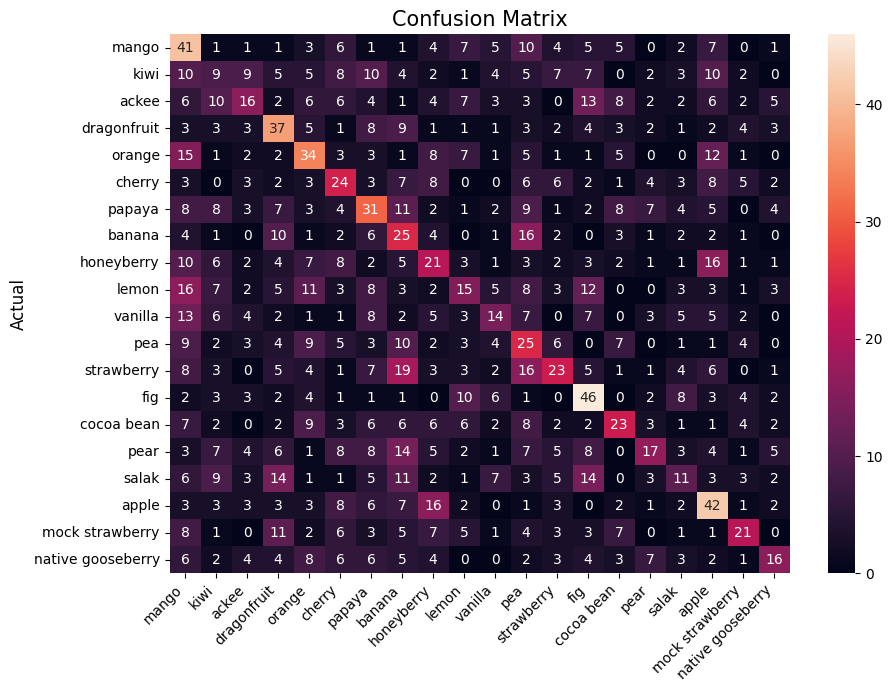

In [9]:
#train knn model
from sklearn.neighbors import KNeighborsClassifier

data_knn = pd.concat([texture,dominant_color,histogram, shapes,labels], axis=1)
data_knn = data_knn[data_knn['label'].isin(random_20)]
data_knn = remove_zero_columns(data_knn)

X = data_knn.drop('label', axis=1)
y = data_knn['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = KNeighborsClassifier(n_neighbors=20, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_20)

# KNN 10 Class

Accuracy:  0.313
Precision:  0.3241788093514477
Recall:  0.313
True Positive:  [21 44 26 25 44 36 26 30 26 35]


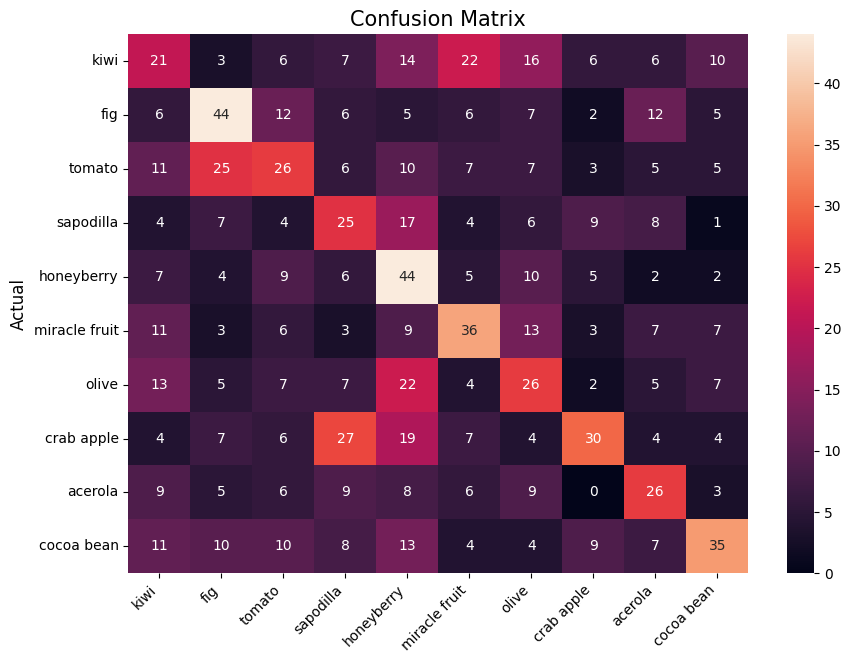

In [10]:
#train knn model
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

data_knn = pd.concat([texture,dominant_color,histogram, shapes,labels], axis=1)
data_knn = data_knn[data_knn['label'].isin(random_10)]
data_knn = remove_zero_columns(data_knn)

X = data_knn.drop('label', axis=1)
y = data_knn['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = KNeighborsClassifier(n_neighbors=20, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_10)

# XGBOOST 20 Class

Accuracy:  0.2805
Precision:  0.27618664902691237
Recall:  0.2805
True Positive:  [37 14 23 25 29 23 43 39 18 18 17 29 25 50 21 35 13 44 29 29]


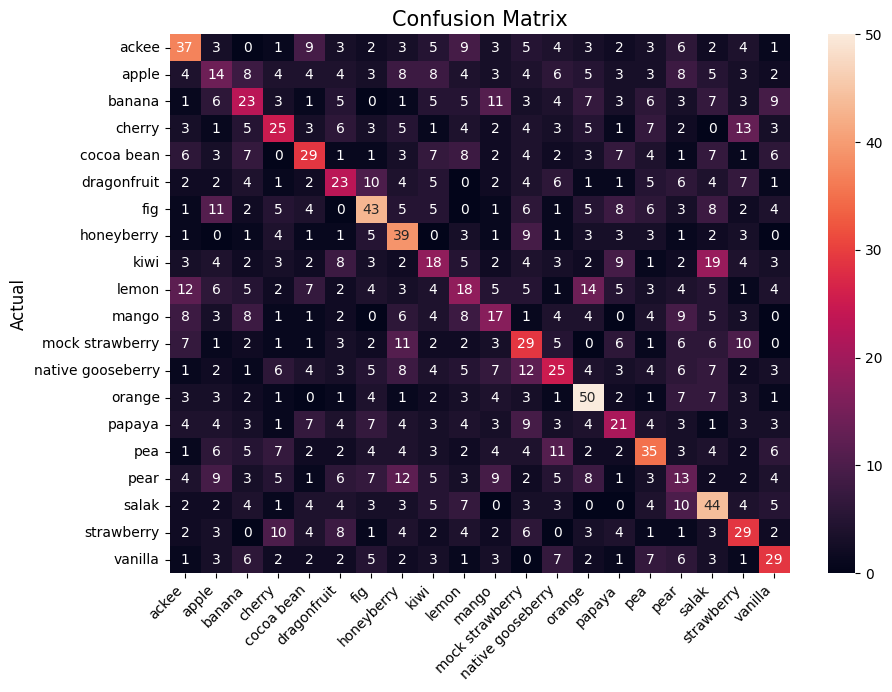

In [11]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

data_xgb = pd.concat([texture, dominant_color, histogram, shapes, labels], axis=1)
data_xgb = data_xgb[data_xgb['label'].isin(random_20)]
data_xgb = remove_zero_columns(data_xgb)

X = data_xgb.drop('label', axis=1)
y = data_xgb['label']

# Scaling features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encoding labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

clf = XGBClassifier(n_estimators=3000, max_depth=25, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

labels_for_plot = label_encoder.inverse_transform(sorted(np.unique(y_test)))
results(y_pred, y_test, labels_for_plot)

# XGBOOST 10 Class

Accuracy:  0.372
Precision:  0.38010610608348394
Recall:  0.372
True Positive:  [28 40 35 36 35 45 26 43 30 54]


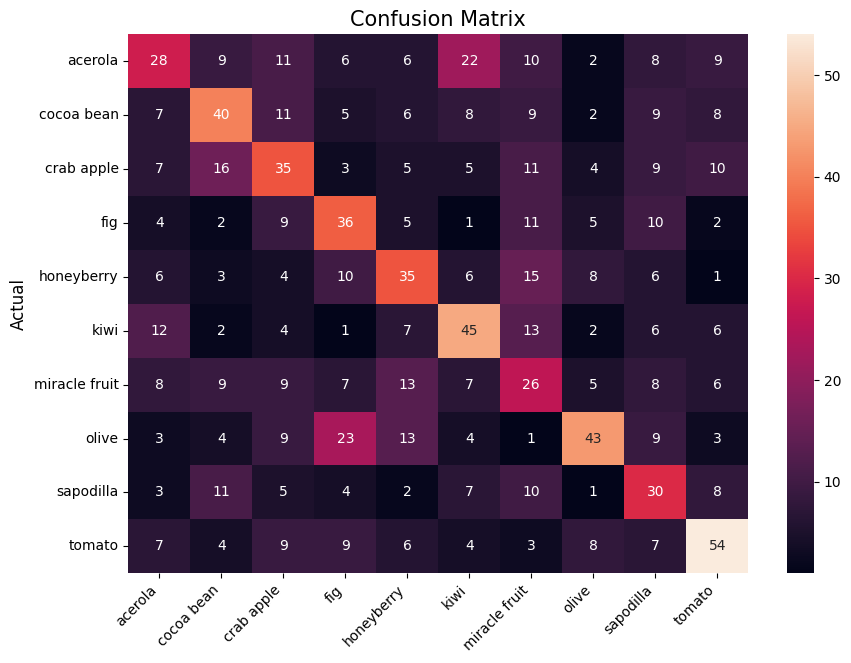

In [12]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

data_xgb = pd.concat([texture, dominant_color, histogram, shapes, labels], axis=1)
data_xgb = data_xgb[data_xgb['label'].isin(random_10)]
data_xgb = remove_zero_columns(data_xgb)

X = data_xgb.drop('label', axis=1)
y = data_xgb['label']

# Scaling features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encoding labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

clf = XGBClassifier(n_estimators=3000, max_depth=25, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

labels_for_plot = label_encoder.inverse_transform(sorted(np.unique(y_test)))
results(y_pred, y_test, labels_for_plot)